In [37]:
import pandas as pd
import numpy as np
import nltk
import gensim
import re
import sklearn
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import models
from gensim.models import Word2Vec, KeyedVectors
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, silhouette_score

In [38]:
df = pd.read_csv('clean.csv')

In [39]:
i=0
list_of_sent=[]
for sent in df['Comment'].values.astype(str):
    list_of_sent.append(sent.split())

In [40]:
import re
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [41]:
i=0
list_of_sent_train=[]
for sent in df['Comment'].values.astype(str):
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

In [42]:
w2v_model=gensim.models.Word2Vec(list_of_sent_train,vector_size=100, epochs = 5, workers=4)

In [43]:
sent_vectors = []; 
for sent in list_of_sent_train:
    sent_vec = np.zeros(100)
    cnt_words =0;
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

C:\Users\adita\AppData\Local\Temp\ipykernel_8704\118135359.py:12: RuntimeWarning: invalid value encountered in true_divide
  sent_vec /= cnt_words


(6084, 100)

In [44]:
num_clus = [x for x in range(1,11)]
num_clus

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

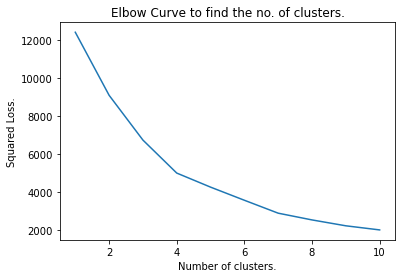

In [45]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors)
    squared_errors.append(kmeans.inertia_) 
    
optimal_clusters = np.argmin(squared_errors) + 2 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()


In [46]:
numpy_array = np.array(squared_errors)

In [47]:
temp = pd.DataFrame(numpy_array,columns = ['SSE'])

In [48]:
temp['Diff'] = temp.diff()

In [49]:
temp

,SSE,Diff
0,12410.677311,NaN
1,9087.200574,-3323.476737
2,6726.445382,-2360.755192
3,4987.828812,-1738.616570
4,4246.577650,-741.251162
5,3554.605139,-691.972511
6,2873.252521,-681.352618
7,2518.099681,-355.152840
8,2208.082223,-310.017458
9,1991.353691,-216.728533


In [50]:
n_clusters=4

In [51]:
model2 = KMeans(n_clusters = 7,init = 'k-means++')
model2.fit(sent_vectors)

KMeans(n_clusters=7)

In [52]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [53]:
word_cluster_center

array([[-7.90656837e-03,  4.26480891e-02,  5.08241888e-02,
        -1.95676910e-02,  2.52446955e-02, -1.15586449e-01,
         3.29032687e-02,  1.41936836e-01, -7.30951869e-02,
        -8.14270414e-02, -1.12215743e-02, -1.09066659e-01,
        -2.24973882e-02,  4.34794855e-02,  1.39795879e-02,
        -2.60517379e-02,  3.48032584e-02, -6.21351783e-02,
        -1.40775457e-02, -1.33557660e-01,  4.89822938e-02,
         7.90410118e-03, -9.25321644e-03, -9.75951796e-02,
        -4.27026295e-03,  2.03319454e-02, -6.85183777e-02,
        -5.92625592e-02, -4.75055872e-02,  2.23990336e-02,
         8.30978863e-02,  2.37855886e-03,  1.41283156e-02,
        -6.08620413e-02,  1.65465282e-02,  8.14039952e-02,
        -2.72549053e-02, -3.17223088e-02, -2.02973973e-02,
        -1.19196190e-01,  4.66453737e-02, -8.26823869e-02,
        -4.41751589e-02,  3.14080096e-02,  4.52855946e-02,
         1.75731692e-02, -4.21993331e-02,  8.04543145e-03,
         4.94090629e-02,  6.73556794e-02,  1.26650187e-0

In [54]:
sil = model2.labels_
df['cluster'] = model2.labels_
df

,Unnamed: 0,Comment,cluster
0,0,gegara liat photo raisa di timesquare ny jadi ...,1
1,1,ini clip video clipnya berasa liat drama ...,1
2,2,semoga gua dapat kesempatan kedua sama sahabat...,5
3,3,iri banget ngeliat orang di komen pada happy ...,5
4,4,backsound ps nih,1
...,...,...,...
6079,6474,selamat ulang tahun kak aa sukses selaluuuu,1
6080,6476,first,0
6081,6477,hmm,0
6082,6478,kali kedua mantap,4


In [55]:
each_silhouette_score = silhouette_samples(sent_vectors,sil,metric="euclidean")

In [56]:
silhouette_score = sklearn.metrics.silhouette_score(sent_vectors, sil, metric='euclidean')

In [57]:
sample_silhouette_values = metrics.silhouette_samples(sent_vectors,sil,metric='euclidean')
num_clusters = 7
means_lst = []
for label in range(num_clusters):
    means_lst.append(sample_silhouette_values[word_cluster_pred_2 == label].mean())

In [58]:
silhouette_score

0.34385277174322854

In [59]:
means_lst

[0.6321938188506442,
 0.24377542076186592,
 0.47658070909933004,
 0.45341924033953196,
 0.3721501102858112,
 0.32697576479083246,
 0.3366342597650728]

In [60]:
df1 = pd.DataFrame(df, columns = ['Cluster', 'Count','Silhouette Score'])

In [61]:
df.groupby('cluster').count()

,Unnamed: 0,Comment
cluster,,
0,622,622
1,2462,2462
2,601,601
3,140,140
4,200,200
5,1953,1953
6,106,106


In [62]:
clust_groupby = df.groupby('cluster')

In [63]:
df1 = pd.DataFrame({'count':clust_groupby.size()}).reset_index()
df1

,cluster,count
0,0,622
1,1,2462
2,2,601
3,3,140
4,4,200
5,5,1953
6,6,106


In [64]:
df1['Silhouette Score'] = means_lst

In [65]:
df1

,cluster,count,Silhouette Score
0,0,622,0.632194
1,1,2462,0.243775
2,2,601,0.476581
3,3,140,0.453419
4,4,200,0.372150
5,5,1953,0.326976
6,6,106,0.336634


In [66]:
df1.mean()

cluster               3.000000
count               869.142857
Silhouette Score      0.405961
dtype: float64

In [67]:
df.groupby('cluster').count()

,Unnamed: 0,Comment
cluster,,
0,622,622
1,2462,2462
2,601,601
3,140,140
4,200,200
5,1953,1953
6,106,106


C:\Users\adita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adita\anacond

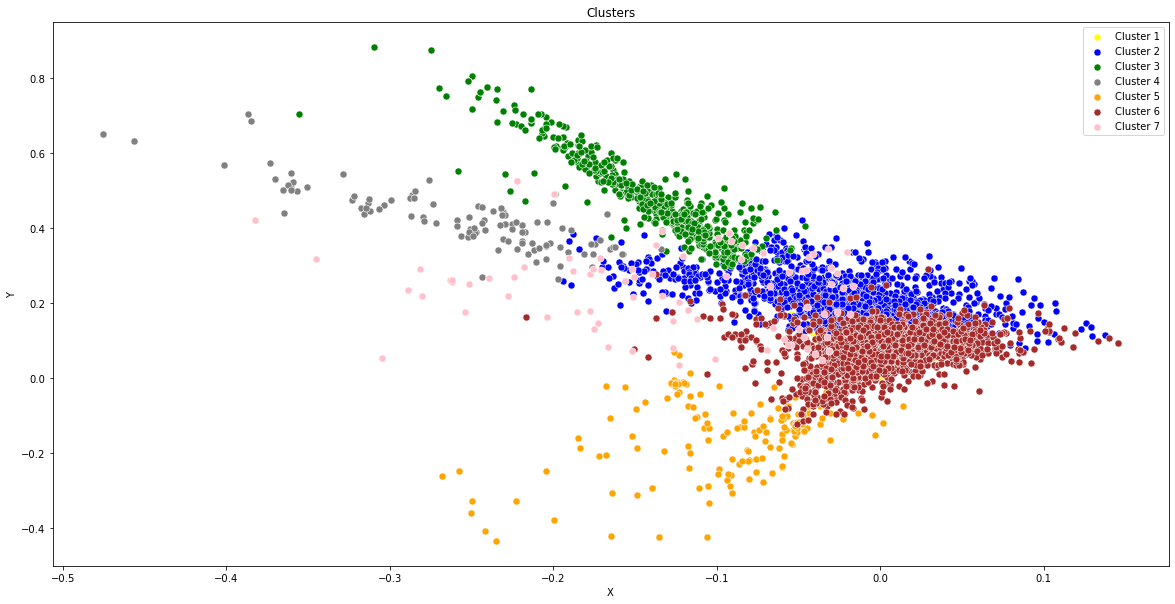

In [68]:
plt.figure(figsize=(20,10))
sns.scatterplot(sent_vectors[word_cluster_pred == 0, 0], sent_vectors[word_cluster_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(sent_vectors[word_cluster_pred == 1, 0], sent_vectors[word_cluster_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(sent_vectors[word_cluster_pred == 2, 0], sent_vectors[word_cluster_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(sent_vectors[word_cluster_pred == 3, 0], sent_vectors[word_cluster_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(sent_vectors[word_cluster_pred == 4, 0], sent_vectors[word_cluster_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(sent_vectors[word_cluster_pred == 5, 0], sent_vectors[word_cluster_pred == 5, 1], color = 'brown', label = 'Cluster 6',s=50)
sns.scatterplot(sent_vectors[word_cluster_pred == 6, 0], sent_vectors[word_cluster_pred == 6, 1], color = 'pink', label = 'Cluster 7',s=50)

plt.grid(False)
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

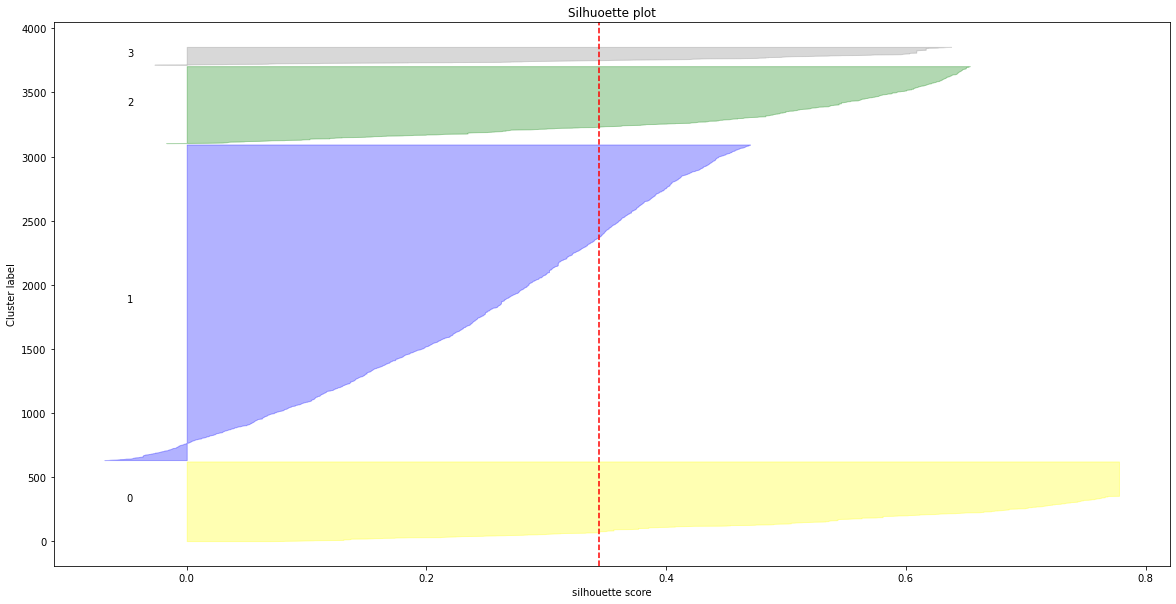

In [69]:
colorlist =["yellow","blue","green","grey","orange","brown","pink"]

fig =plt.figure()
fig.set_size_inches(20, 10)
ax = fig.add_subplot(1,1,1)
y_lower =1
for i in range(n_clusters):
    ith_cluster_silhouette_values = each_silhouette_score[sil == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.3)
    
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,str(i))

    y_lower = y_upper +10 
    
ax.set_title("Silhuoette plot")
ax.set_xlabel("silhouette score")
ax.set_ylabel("Cluster label")
    

ax.axvline(x=silhouette_score,color="red",linestyle="--")

In [72]:
sample_silhouette_values = metrics.silhouette_samples(sent_vectors,sil,metric='euclidean')
num_clusters = 4
means_lst = []
for label in range(num_clusters):
    means_lst.append(sample_silhouette_values[word_cluster_pred_2 == label].mean())

In [73]:
means_lst

[0.6321938188506442,
 0.24377542076186592,
 0.47658070909933004,
 0.45341924033953196]